# Beer Consumption and Attractiveness to Malaria Mosquitos
## Carlos Hinrichsen
### May 21st, 2019

The purpose of this task is to respond several questions regarding a publication that found a relation between beer consumption and attractiveness to malaria mosquitos. More information about the study could be found in the followuing link: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009546  

The questions to be responded are:

1. Create side-by-side boxplots for the number of mosquitoes in each group (beer vs water)
2. Answer the question: What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitoes?
3. Calculate basic statistics measures for each group: the mean, median, standard deviation and explain the numbers.
4. Write the code to implement the data simulation demonstrated in the video on the following link: https://www.youtube.com/watch?v=5Dnw46eC-0o. Calculate the probability of obtaining the experiment outcome

Below you will find the step-by-step process to respond the questions

__IMPORTANT NOTE: PLEASE REVIEW THE "SECTION 6. APPENDIX" BEFORE RUNNING THE WHOLE NOTEBOOK__ 

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pn
import os
import seaborn as sb
from scipy import stats
import math
import random

## 2. Import and Clean Data Set

In [2]:
# Getting first the working directory
wd = os.getcwd()
# Create a path with the data set within the workig directory
path = wd +  "/mosquitos_data-3.csv"
# Read the csv file and create an array to manipulate the data
mosquitos = (pn.read_csv(path))
# Subset mosquitos by response
mosquitos_r = mosquitos.Response
# Divide the data according to each Treatment
Beer = (mosquitos.Response[mosquitos.Treatment=='Beer'])
Water = (mosquitos.Response[mosquitos.Treatment=='Water'])

## 3. Create side-by-side boxplot and perform t-test

T-Test Results =  Ttest_indResult(statistic=3.658244539721401, pvalue=0.0007474019079041515)


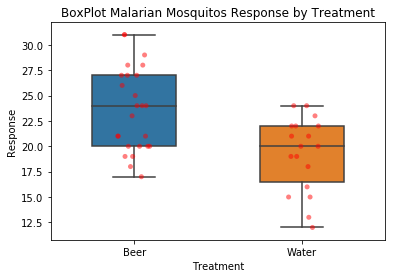

In [3]:
# First we create the boxplot
b = sb.boxplot(x='Treatment', y='Response', data=mosquitos, width=0.5).set_title("BoxPlot Malarian Mosquitos Response by Treatment")
# Then we add the points that representes each box
b = sb.stripplot(x='Treatment', y='Response', data=mosquitos, jitter=True, marker='o', alpha=0.5, color='red')
# Performing the t-test
print('T-Test Results = ',stats.ttest_ind(Beer,Water,equal_var=False))

Once created the boxplot, it is simple to look that overall the group represented by Beer has a higher Reponse than the group represented by Water. Therefore, we could infer that there is a positive association between beer consumption and attractiveness to mosquitoes. Despite of this argument, looking the distribution of Response data by each group (coloured by red), we understood that there are points in the Beer group where the Response is lower than in Water group, so it is important to perform a t-test in order to understand the significance of the different of Responses when comparing both groups.

Once performed the t-test above, the p-value is lower than a significance level of 5%, therefore there difference of mean between each groups is significative. 

## 4. Statistics of Treatment Groups

Below are described the statistics of Responses by each Group. 

In [4]:
# Mean of the Response by different Treatment groups
print('Mean Response of Beer Group =',Beer.mean())
print('Mean Response of Water Group =',Water.mean())
# Median of the Response by different Treatment groups
print('Median Response of Beer Group =',Beer.median())
print('Median Response of Water Group =',Water.median())
# Standard Deviation of the Response by different Treatment groups
print('Standard Deviation of Response of Beer Group =',Beer.std())
print('Standard Deviation of Response of Water Group =',Water.std())

Mean Response of Beer Group = 23.6
Mean Response of Water Group = 19.22222222222222
Median Response of Beer Group = 24.0
Median Response of Water Group = 20.0
Standard Deviation of Response of Beer Group = 4.133198922545748
Standard Deviation of Response of Water Group = 3.6711202899124045


The statistics shown that the mean of the Response of the Bear group is higher than the Water group, as shown in the boxplot in the section 3. Additionally, the median is also higher on the Beer group, highlighting the same argument. On the other hand, the standard deviation in the Beer group is slighty higher than the Water group, therefore is it not clear that we can infer that the means of the Response of each Treatment group are statistically different. 

## 5. Simulation of Experiment

Below are described the steps to perform the simulation experiment shown in the video https://www.youtube.com/watch?v=5Dnw46eC-0o. The number of iterations used were 400,000, according to a convergence analysis in the section 6 - Appendix. 

Probability = 0.058750000000000004 %


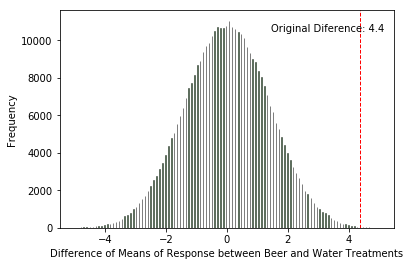

In [5]:
# For reproducibility, we set the initial seed
np.random.seed(1234)
# Calculate the original difference of mean
dif_or = Beer.mean()-Water.mean()
# We set the number of iterations and number of bins for the histogram
iterations = 400000
bins = int(round(math.sqrt(iterations),0))
# We set the initial variables to be used below
dif_sim=[]
count = 0
for i in range(iterations):
        # First we set the elements of mosquitos Response in a different order than original
        d_order = np.random.choice(mosquitos_r, size=mosquitos_r.size, replace=False)
        # Here we split the new order of Responses by Water and Beer groups (18 and 25 elements each)
        subset_data=np.split(d_order,[Water.size,Water.size+Beer.size])
        # Here we calculate the difference of the Response mean between Beer and Water Treatment
        dif_means = subset_data[1].mean()-subset_data[0].mean()
        # We save the difference in a list, where we will save all the differences
        dif_sim.append(dif_means)
        # While the difference of means is higher than the original difference of means, 
        # count it to calculate then the probability of obtaining the experiment outcome
        while dif_means >= dif_or:
            count = count + 1
            break

# Here we plot the histogram of the difference of means for each iteration
plt.hist(dif_sim,bins = bins, facecolor='green', alpha=0.5,edgecolor='black',linewidth=1,range=[-5, 5])
# We plot over the histogram a red line with the original value of the difference of mean
plt.axvline(dif_or, color='red', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.text(dif_or-dif_or/1.5, max_ - max_/10, 
         'Original Diference: {:.1f}'.format(dif_or))
plt.xlabel('Difference of Means of Response between Beer and Water Treatments')
plt.ylabel('Frequency')
# Finally, we calculate the probability of obtaining the experiment outcome 
print('Probability =',count/iterations*100, "%")

Looking the calculated probability and distribution of the difference of the means, we could conclude that the original difference of means of 4.4 is a strange event, as the skeptic hypothesis. Therefore, as mentioned in the video, the skeptics arguments strains credibility and can be safely rejected.

## 6. Appendix - Number of Iterations Selected

In order to understand the number of iterations used in the simulation, a convergence test was performed below. The idea is to recreate the simulation of the section 5, from 10,000 to 500,000 iterations (with a step of 10,000 iterations), calculate the probability of obtaining the experiment outcome of each number of iterations, and thus understand where this probability reduces its variability. Below, a plot is performed to ilustrate the analysis.
__Warning: This process could take several minutes, due to 50 different simulations will be performed__

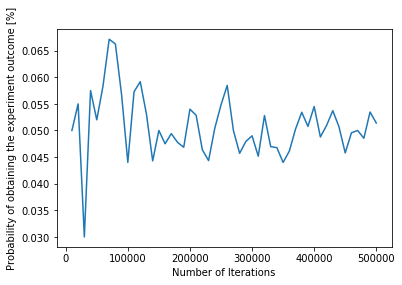

In [6]:
# The comments of the code are similar than those in the section 5, therefore no comments are shown in the code 
np.random.seed(1234)
it = 50
prob1 = []
iters = []
for j in range(it):
    all_diff=[]
    count = 0
    Counting = 0
    iterations = (j+1)*10000
    for i in range(iterations):
            d_order = np.random.choice(mosquitos_r, size=mosquitos_r.size, replace=False)
            subset_data=np.split(d_order,[Water.size,Water.size+Beer.size])
            dif_means = subset_data[1].mean()-subset_data[0].mean()
            while dif_means >= dif_or:
                count = count + 1
                break
    Counting = [count/iterations*100]
    prob1=prob1+Counting 
    iters = iters + [iterations]
plt.xlabel('Number of Iterations')
plt.ylabel('Probability of obtaining the experiment outcome [%]')
plt.plot(iters,prob1)

Therefore, looking the plot it is easy to see that the variability of the "Probability of obtaining the experiment outcome" starts reducing around 400,000 number of iterations. 